# Finding the Best Two Markets to Advertise In
### Guided Project:

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the data
To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

%matplotlib inline
import matplotlib.pyplot as plt

pd.options.display.max_columns = 150 # to avoid truncated output 

In [2]:
#  we will use low_memory = False, to silence dtypes warning for low_memory alerts
# there are also 4 columns which we will parse as datetime object
data_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(data_link, parse_dates = (["Part1EndTime", "Part1StartTime", "Part2EndTime", "Part2StartTime"]), low_memory = False)
fcc.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
BootcampFinish                   1069 non-null float64
BootcampLoanYesNo                1079 non-null float64
BootcampName                     949 non-null object
BootcampRecommend                1073 non-null float64
ChildrenNumber                   2314 non-null float64
CityPopulation                   15354 non-null object
CodeEventConferences             1609 non-null float64
CodeEventDjangoGirls             165 non-null float64
CodeEventFCC                     1708 non-null float64
CodeEventGameJam                 290 non-null float64
CodeEventGirlDev                 297 non-null float64
CodeEventHackathons              1977 non-null float64
CodeEventMeetup                  2472 non-null float64
CodeEventNodeSchool              446 non-null float64
CodeEventNone 

In [3]:
# Printing first 5 rows, and setting Panda's view option for multiple columns
pd.options.display.max_columns = 150 # to avoid truncated output 
fcc.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. We will start analysing *JobRoleInterest* column which describes for every participant the role(s) they'd be interested in working.

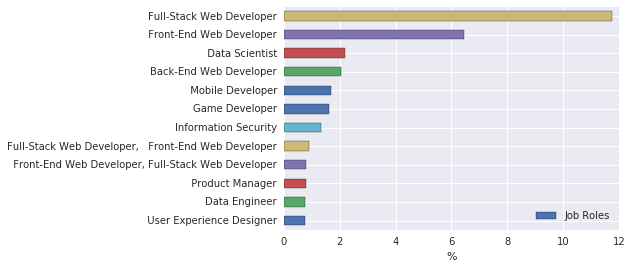

Percent of people who did not filled in the 'JobRoleInterest' columns: 62.0%


In [4]:
# Frequency distribution table in percentages for the 'JobRoleInterest' column
job_role_freq = fcc['JobRoleInterest'].value_counts(normalize = True) * 100

# Plotting most popular job roles (first 15)
job_role_freq[:12].sort_values(ascending = True).plot.barh(label = 'Job Roles')
plt.legend(loc = 'lower right')
plt.xlabel('%')
plt.show()

# calculating the percent of people who put a job role
jobrole_percent = fcc['JobRoleInterest'].isnull().sum() / fcc['JobRoleInterest'].shape[0] * 100
print("Percent of people who did not filled in the 'JobRoleInterest' columns: {}%".format(jobrole_percent.round()))

We see that most wanted job roles from the respondents who filled in this part of the survey is:
* The *Full-Stack Web Developer* with 11.7% 
* *Front-End Web Developer* with just over 6%. Furthermore, we see that 62% of the respondents did not fill in the *JobRoleInterest* column.

Another, feature which is unfolding is that some of the people who filled in that collumn, have answered with more than one response. Thus, we see duplicate job roles. In the graph above we see the 'Full-Stack Web Developer' as a singe role and then a combination of that with some other role which is in the web develpment. Thus, we can try and clean the *'JobRoleInterest'* column, to see how many respondents are interested in more than one subject.

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64


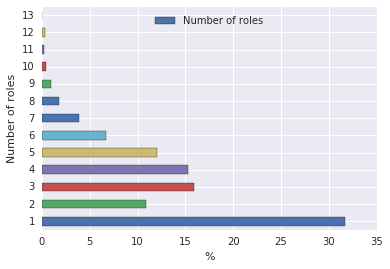

In [5]:
# Splitting the roles, converting to lower case, and dropping the rows with NaN (missing) values
cleaned_roles = fcc['JobRoleInterest'].dropna().str.lower().str.split(',')

# Creating a function 
def counting_roles(x):
    return len(x)

# And generating a frequency table (percentages)
rolesf_table = cleaned_roles.apply(counting_roles).value_counts(normalize = True).sort_index() * 100
print(rolesf_table)

rolesf_table.plot.barh(label = 'Number of roles')
plt.ylabel('Number of roles')
plt.xlabel('%')
plt.legend(loc = 'upper center')
plt.show()

Only 31% have a clear idea about a potential job that they want to do. All other respondents in the survey have mixed interest.  Moreover, since our focus is on web development and mobile development this might be beneficial for us. To dive in deeper, we would need to see how many people chose one of these two job roles.

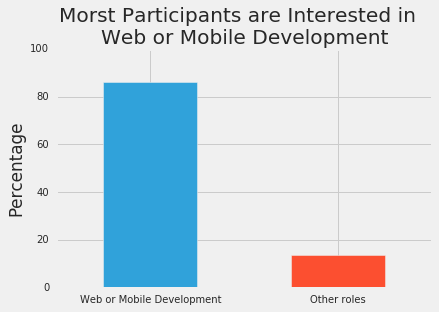

True     86.270023
False    13.729977
Name: cleaned_roles, dtype: float64


In [6]:
# removing NaN values and making all strings lowercase
fcc['cleaned_roles'] = fcc['JobRoleInterest'].str.lower().dropna()

# We will select 'Web Developer'  and ' Mobile Developer' roles and generate a new frequency table
dual_roles = fcc['cleaned_roles'].str.contains('web developer|mobile developer').value_counts(normalize = True) * 100

# Plotting data on a graph and labeling
plt.style.use('fivethirtyeight')
dual_roles.plot.bar()
plt.title('Morst Participants are Interested in  \nWeb or Mobile Development')
plt.xticks([0,1],['Web or Mobile Development', 'Other roles'], rotation = 0)
plt.ylim([0,100])
plt.ylabel('Percentage')
plt.show()

print(dual_roles)

Graph above shows that around 86% of the people who filled their desired position, are interested in either web or mobile development. This is a strong reason to consider this sample as representative for our population of interest. Our advertisements can be geared towards all kinds of programming niches, but mostly web and mobile development.

## New Coders - Locations and Densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

In our dataset we have two columns which provide information about the location of each participant at a country level. The *CountryCitizen* variable describes the country of origin for each participant, and the *CountryLive* variable describes what country each participant lives in (which may be different than the origin country). As we are interested where people actually live, we will work with the *CountryLive* variable.

We can segment the market by country and think of it as an individual market. Indicator of a good market is the number of potential customers - the more potential customers in a market, the better. And our ads will be targeted with countries with the largest populations.

Since we have a lot samples where people did not fill in the role options, we will work only with the data where respondents specifically answered this question.

                          Absolute Values  Percentage
United States of America             3125   45.700497
India                                 528    7.721556
United Kingdom                        315    4.606610
Canada                                260    3.802281
Poland                                131    1.915765
Brazil                                129    1.886517
Germany                               125    1.828020
Australia                             112    1.637906
Russia                                102    1.491664
Ukraine                                89    1.301550


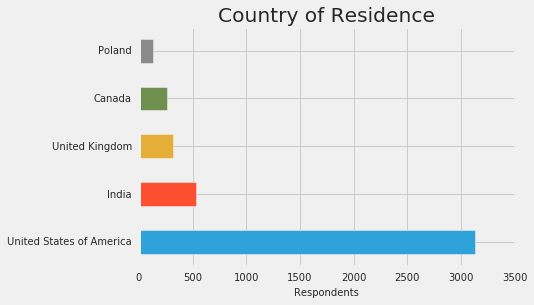

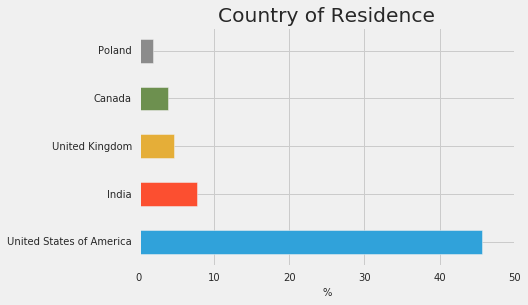

In [7]:
# Cleaning the dataset by dropping all the rows where participants didn't answer what role they are interested in.
fcc_cleaned = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Generating two frequency tables, with both absolute and relative values.
absolute_freq = fcc_cleaned['CountryLive'].value_counts()
relative_freq = fcc_cleaned['CountryLive'].value_counts(normalize = True) * 100

# Combining two table into one DataFrame.
country_freq = pd.DataFrame({'Absolute Values': absolute_freq, 'Percentage': relative_freq})

# Printing first 10 rows.
print(country_freq.head(10))

# Plotting for more visibility.
country_freq['Absolute Values'].head(5).plot.barh()
plt.title('Country of Residence')
plt.xlabel('Respondents', size = 10)
plt.show()

country_freq['Percentage'].head(5).plot.barh()
plt.title('Country of Residence')
plt.xlabel('%', size = 10)
plt.show()

From the above frequency table and graphs, it is easy to determine that based on the country of residence. We can target markets in US, India, and UK.
Majority of the people who filled in the job role are from the US around 46%. Then, respondents from India come second with almost 8%. And then are people living in the UK with 5%.


## Spending Money for Learning

We found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

We will start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the *MoneyForLearning* column to the *MonthsProgramming* column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the *MonthsProgramming* column.

In [8]:
# Replacing all 0 values with 1, to avoid dividing by 0.
fcc_cleaned['MonthsProgramming'].replace(0,1, inplace = True)

# New columns describing the amount of money a student is willing to spend per month
fcc_cleaned['MoneyPerMonth'] = fcc_cleaned['MoneyForLearning'] / fcc_cleaned['MonthsProgramming']
fcc_cleaned[['MoneyPerMonth', 'MoneyForLearning', 'MonthsProgramming']]

# Finding how many of the potential students are not willing to spend money.
no_money = fcc_cleaned['MoneyPerMonth'].isnull().value_counts()
no_money

False    6317
True      675
Name: MoneyPerMonth, dtype: int64

As seen there are 675 people out of all who filled in this question, that are not willing to spend money.
Now, we will only keep the rows  with non-null values for the new column that was just created *MoneyPerMonth*.
There are also null values in the *CountryLive* column, thus, we are going to remove these too.

In [9]:
# Dropping null values in the 'MoneyPerMonth' and in 'CountryLive' columns.
fcc_cleaned = fcc_cleaned[fcc_cleaned['MoneyPerMonth'].notnull()]
fcc_cleaned = fcc_cleaned[fcc_cleaned['CountryLive'].notnull()]
fcc_cleaned['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

Moving along, we will group the remaining data by the *CountryLive* column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [10]:
# Grouping by Coounty of residence, with mean values
fcc_mean = fcc_cleaned.groupby('CountryLive').mean().reset_index()

# List of countried we are interested in.
country_list = ['United States of America', 'India', 'United Kingdom', 'Canada']

# Slicing and sorting only the necessary data.
fcc_mean[fcc_mean['CountryLive'].isin(country_list)][['CountryLive', 'MoneyPerMonth']].sort_values('MoneyPerMonth', ascending = False)

,CountryLive,MoneyPerMonth
122,United States of America,227.997996
52,India,135.100982
19,Canada,113.510961
121,United Kingdom,45.534443


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita]('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies')), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

##  Dealing with Extreme Outliers

Below we generated four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



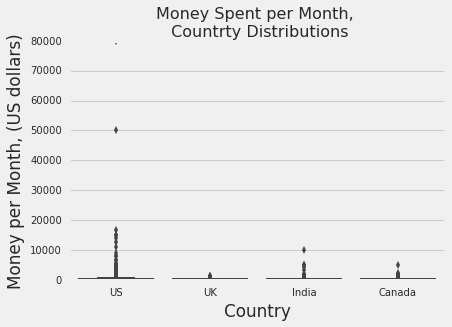

In [11]:
# selectin only the four countries.
four_con = fcc_cleaned[fcc_cleaned['CountryLive'].str.contains(
    'India|Canada|United Kingdom|United States of America')]

# visialising with Seaborn boxplots
sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = four_con)
plt.title('Money Spent per Month, \n Countrty Distributions', fontsize = 16)
plt.ylabel('Money per Month, (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4),['US', 'UK', 'India', 'Canada'])
plt.show()

It is difficult to establish from the plot above whether data is representative. Lookig at the data for US we see something off, two people are spending 50,000$ or more per month. This is almost impossible, thus we will remove any values that go over 20,000 a month.

In [12]:
# Showing extreme outliers
four_con[fcc_cleaned['MoneyPerMonth']  > 20000][['CountryLive', 'MoneyPerMonth']]

# Creating a new DataFrame with values under 20000$ per month
four_con = four_con[four_con['MoneyPerMonth'] < 20000].copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Now we will reload the same box plots, but this time these extreme outliers will be excluded.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f0f8d3c27b8>,
 <a list of 4 Text xticklabel objects>)

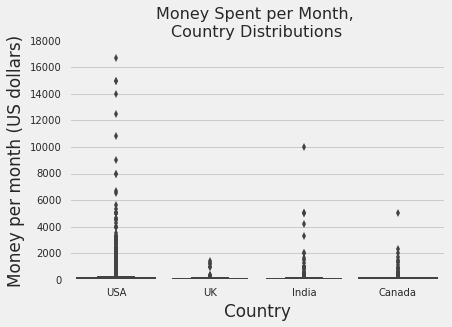

In [13]:
# Visualising the new boxplots
sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth',
           data = four_con)
plt.title("Money Spent per Month, \nCountry Distributions", fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4),['USA', 'UK', 'India', 'Canada'])

Now that the extreme outliers have been eliminated, box plots show more representable picture of the monthly spenders per country. Some values still seem a little off.
After eliminating the extreme outliers, we found the new mean values:

In [14]:
# New mean values
new_mean = four_con.groupby('CountryLive').mean().reset_index()
new_mean[['CountryLive', 'MoneyPerMonth']].head().sort_values('MoneyPerMonth')

,CountryLive,MoneyPerMonth
2,United Kingdom,45.534443
0,Canada,113.510961
1,India,135.100982
3,United States of America,183.800110


We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these people attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.


In [15]:
# Extreme outliers for India
india = four_con[
    (four_con['CountryLive'] == 'India') & 
    (four_con['MoneyPerMonth'] >= 2500)]


india[['CountryLive', 'MoneyPerMonth', 'AttendedBootcamp']]

,CountryLive,MoneyPerMonth,AttendedBootcamp
1728,India,5000.000000,0.0
1755,India,3333.333333,0.0
7989,India,5000.000000,0.0
8126,India,5000.000000,0.0
13398,India,10000.000000,0.0
15587,India,4166.666667,0.0


It seems that neither participant attended a bootcamp. It's difficult to figure out from the data whether these people really spent that much money on learning. The actual question of the survey was *"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"*, so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.


In [16]:
# Removing outliers for India
four_con = four_con.drop(india.index) # using the row labels


Furthermore, when we look at the boxplots above, we see that there are even more extreme outliers for US (values over $6000 per month). Thus, let's examine these in more detail.

In [17]:
# Extreme outliers for US
us = four_con[(four_con['MoneyPerMonth'] > 6000) & (four_con['CountryLive'] == 'United States of America')]
us[['CountryLive', 'MoneyPerMonth', 'AttendedBootcamp', 'MonthsProgramming']]


,CountryLive,MoneyPerMonth,AttendedBootcamp,MonthsProgramming
718,United States of America,8000.000000,1.0,1.0
1222,United States of America,6500.000000,1.0,2.0
3184,United States of America,9000.000000,1.0,1.0
3930,United States of America,10833.333333,0.0,6.0
6805,United States of America,15000.000000,1.0,1.0
7198,United States of America,14000.000000,0.0,5.0
7505,United States of America,6666.666667,1.0,3.0
9778,United States of America,8000.000000,1.0,1.0
16650,United States of America,16666.666667,0.0,12.0
16997,United States of America,12500.000000,0.0,1.0


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported that they spend $6000 each month, but they have never attended a bootcamp.
Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). Therefore, we'll remove these eight outliers.
In the next code block, we'll remove respondents that:
* Didn't attend bootcamps.
* Had been programming for three months or less when at the time they completed the survey.



In [18]:
# Removing US outliers who did not attend a bootcamp
us = four_con[(four_con['CountryLive'] == 'United States of America') &
    (four_con['MoneyPerMonth'] >= 6000) & 
    (four_con['AttendedBootcamp'] == 0)]

# Dropping these extreme US outiers
four_con = four_con.drop(us.index)


# Removing the respondents that had been programmin for less than 3 months
less_than_3 = four_con[
    (four_con['CountryLive'] == 'United States of America') & 
    (four_con['MoneyPerMonth'] > 6000) & 
    (four_con['MonthsProgramming'] <= 3)]

# Dropping US outliers where people have been programming less than 3 months

four_con = four_con.drop(less_than_3.index)


Going further we can see there is one extreme outlier for Canada. A single person who spend around $5000 per month. We can check in detail


In [19]:
# Extreme outliers for Canada
canada = four_con[
    (four_con['CountryLive'] == 'Canada') &
    (four_con['MoneyPerMonth'] >= 5000)]

canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,cleaned_roles,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"mobile developer, full-stack web developer, ...",5000.0


We see identical situation to some of the US respondents - this person had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We will follow same approach and remove this utlier.

In [20]:
# Removing extreme outliers for Canada.
four_con = four_con.drop(canada.index)

We will now recompute the new mean values and generate a fresh box plots. After eliminating the extreme outliers, we found the following mean values:

In [21]:
#  New mean sum of money spent per month
four_con.groupby('CountryLive').mean()['MoneyPerMonth']


CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f0f8da44588>,
 <a list of 4 Text xticklabel objects>)

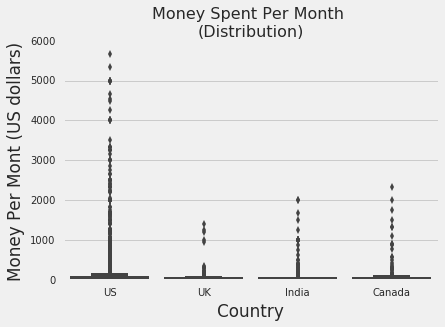

In [22]:
# Plotting these values 

sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
           data = four_con)
plt.title('Money Spent Per Month \n(Distribution)', fontsize = 16)
plt.ylabel('Money Per Mont (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

## Choosing the Two Best Markets

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month - around $143.

We need to choose one more market though.
We sell subscriptions at a price of 59 dollars per month, and Canada seems to be the best second option here as people are willing to spend around 93 dollars per month, in comparison people in India and UK are only willing to spend 66 and 46 dollars respectively.

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

* 59 dollars doesn't seem like much as on average people living in india are willing to spend $66 each month.
* Adittionally, we have almost twice more potential customers in India than we have in Canada:

In [23]:
four_con['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So, it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might be a better choice because of the large number of potential customers.

There are several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
 * 60% for the US, 25% for India, 15% for Canada.
 * 50% for the US, 30% for India, 20% for Canada; etc.
 
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
 * 70% for the US, and 30% for India.
 * 65% for the US, and 35% for Canada; etc.
 
 At that stage, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.


## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.